In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler

# Step 1: Fetch data with a larger range for computational cost
ticker = '^TNX'  # U.S. 10-year Treasury yield (interest rates)
data = yf.download(ticker, start='2000-01-01', end='2024-01-01')  # Extended data range
interest_rates = data['Adj Close']

# Step 2: Normalize the interest rates
scaler = StandardScaler()
interest_rates_normalized = scaler.fit_transform(interest_rates.values.reshape(-1, 1))

# Step 3: Build the VAE model with increased complexity

latent_dim = 3  # Increased latent dimension for complexity

# Encoder model with more layers and neurons
inputs = layers.Input(shape=(1,))
x = layers.Dense(128, activation='relu')(inputs)  # Increased layer size
x = layers.Dense(64, activation='relu')(x)  # Increased layer size
x = layers.Dense(32, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

# Reparameterization trick (sampling from a normal distribution)
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Sampling()([z_mean, z_log_var])

# Decoder model with more complexity
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='relu')(latent_inputs)  # Increased layer size
x = layers.Dense(128, activation='relu')(x)  # Increased layer size
outputs = layers.Dense(1)(x)

# Instantiate the models
encoder = models.Model(inputs, [z_mean, z_log_var, z])
decoder = models.Model(latent_inputs, outputs)
vae_output = decoder(encoder(inputs)[2])

# Custom loss function as part of the Keras model
def vae_loss(inputs, vae_output, z_mean, z_log_var):
    xent_loss = K.mean(K.square(inputs - vae_output), axis=-1)
    kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return xent_loss + kl_loss

# Create a custom model that integrates the loss into the call method
class VAEWithLoss(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAEWithLoss, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        vae_output = self.decoder(z)
        loss = vae_loss(inputs, vae_output, z_mean, z_log_var)
        self.add_loss(loss)
        return vae_output

# Instantiate the VAE model with the loss integrated
vae = VAEWithLoss(encoder, decoder)
vae.compile(optimizer='adam')

# Step 4: Train the VAE with increased computational load
vae.fit(interest_rates_normalized, interest_rates_normalized, epochs=50, batch_size=16)  # More epochs and smaller batch size

# Step 5: Visualize the learned latent factors (Increased computation)
# The latent factors can be used as features for building credit risk models.
# For example, you can combine these factors with other features (e.g., borrower profiles)
# to predict the likelihood of default using a classifier such as Logistic Regression or XGBoost.


2025-01-11 12:23:38.569281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736616218.743271  744969 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736616218.790046  744969 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-11 12:23:39.291645: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[*********************100%***********************]  1 of 1 completed

Epoch 1/50



2025-01-11 12:23:45.579590: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 11.1664
Epoch 2/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6223
Epoch 3/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4962
Epoch 4/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4373
Epoch 5/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4140
Epoch 6/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.3714
Epoch 7/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4019
Epoch 8/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4716
Epoch 9/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4427
Epoch 10/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4845
Epoch 11/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.3951
Epoch 12/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4566
Epoch 13/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.5098
Epoch 14/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.3891
Epoch 15/50
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.3083

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


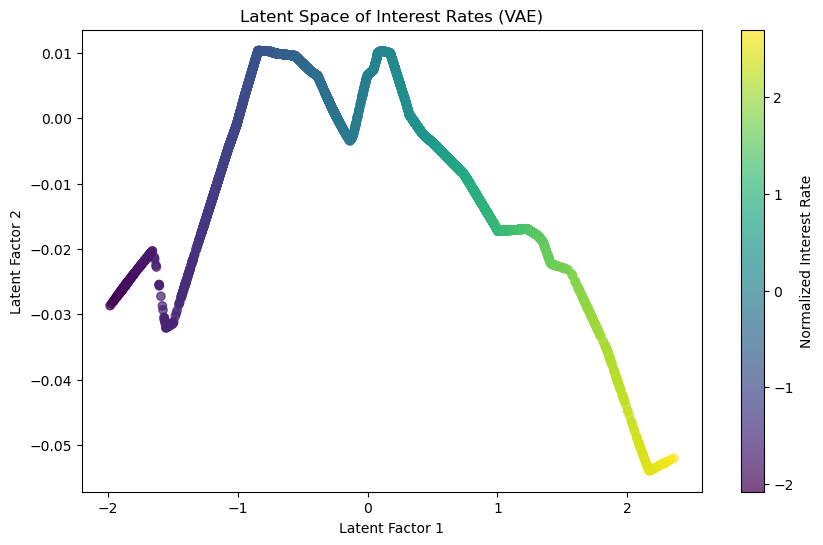

In [2]:
# Step 5: Visualize the learned latent factors (Fixing the color issue)
z_mean, _, _ = encoder.predict(interest_rates_normalized)
plt.figure(figsize=(10, 6))

# Pass the normalized interest rates as color values
plt.scatter(z_mean[:, 0], z_mean[:, 1], c=interest_rates_normalized.flatten(), cmap='viridis', alpha=0.7)

plt.title("Latent Space of Interest Rates (VAE)")
plt.xlabel("Latent Factor 1")
plt.ylabel("Latent Factor 2")
plt.colorbar(label="Normalized Interest Rate")
plt.savefig("Latent Space of Interest Rates 1.png", dpi=300)
plt.show()


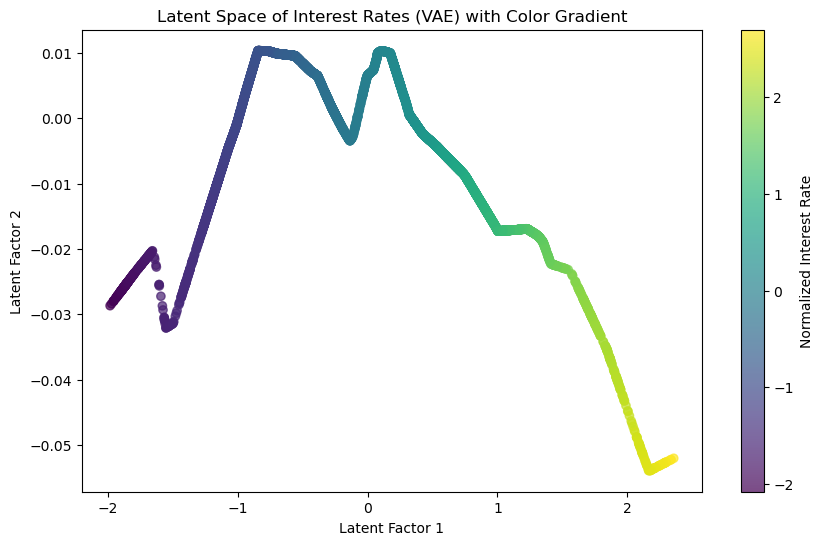

In [3]:
# 2D Latent Space with Color Gradient
plt.figure(figsize=(10, 6))
plt.scatter(z_mean[:, 0], z_mean[:, 1], c=interest_rates_normalized.flatten(), cmap='viridis', alpha=0.7)
plt.title("Latent Space of Interest Rates (VAE) with Color Gradient")
plt.xlabel("Latent Factor 1")
plt.ylabel("Latent Factor 2")
plt.colorbar(label="Normalized Interest Rate")
plt.savefig("Latent Space of Interest Rates (VAE) with Color Gradient 1.png", dpi=300)
plt.show()


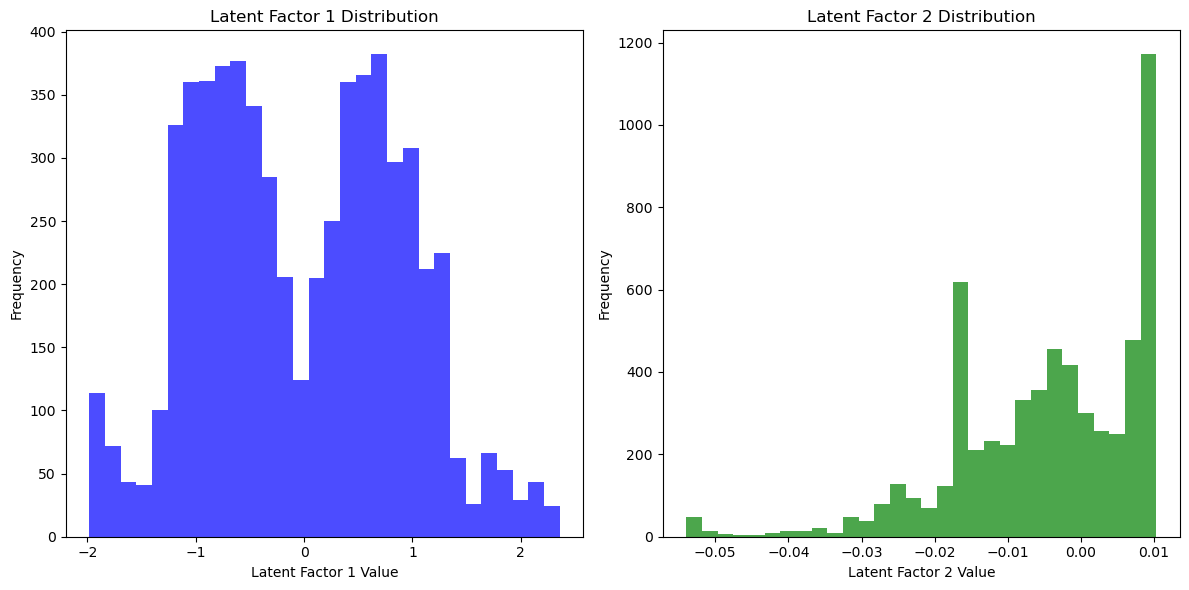

In [4]:
# Histogram of Latent Factors
plt.figure(figsize=(12, 6))

# Plot the histogram for the two latent dimensions
plt.subplot(1, 2, 1)
plt.hist(z_mean[:, 0], bins=30, color='blue', alpha=0.7)
plt.title("Latent Factor 1 Distribution")
plt.xlabel("Latent Factor 1 Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(z_mean[:, 1], bins=30, color='green', alpha=0.7)
plt.title("Latent Factor 2 Distribution")
plt.xlabel("Latent Factor 2 Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig("Latent Factor 1 2 Distribution.png", dpi=300)
plt.show()


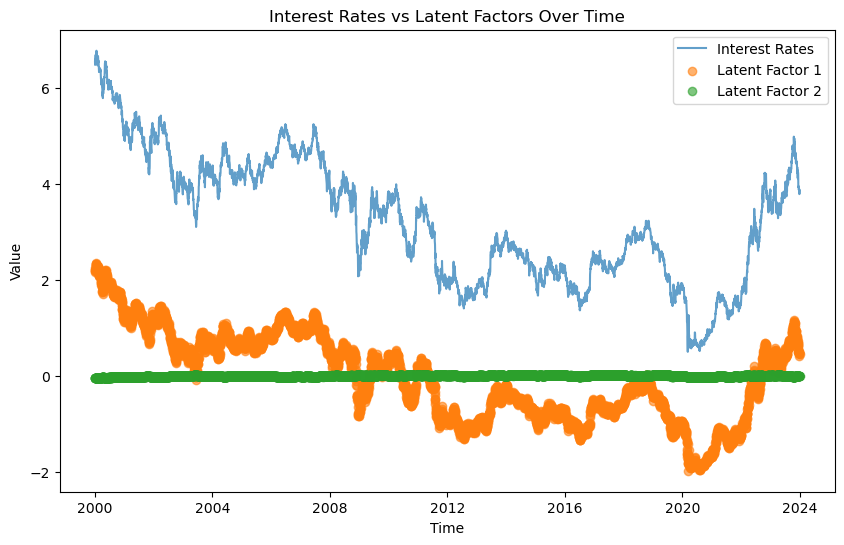

In [5]:
# Latent Space Over Time (Interest Rate vs Time)
plt.figure(figsize=(10, 6))
plt.plot(data.index, interest_rates, label="Interest Rates", color='tab:blue', alpha=0.7)
plt.scatter(data.index, z_mean[:, 0], label="Latent Factor 1", color='tab:orange', alpha=0.6)
plt.scatter(data.index, z_mean[:, 1], label="Latent Factor 2", color='tab:green', alpha=0.6)

plt.title("Interest Rates vs Latent Factors Over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.savefig("Interest Rates vs Latent Factors Over Time.png", dpi=300)
plt.show()


In [ ]:
# Rescale latent factors for better visualization
z_mean_rescaled = scaler.fit_transform(z_mean)  # Normalize latent factors

# Plot the Interest Rates vs Latent Factors Over Time with improved visibility
plt.figure(figsize=(12, 8))

# Plot the interest rates
plt.plot(data.index, interest_rates, label="Interest Rates", color='tab:blue', alpha=0.7, linewidth=2)

# Plot the latent factors on a secondary y-axis for better scaling
fig, ax1 = plt.subplots(figsize=(12, 8))

# Primary axis for interest rates
ax1.plot(data.index, interest_rates, label="Interest Rates", color='tab:blue', alpha=0.7, linewidth=2)
ax1.set_ylabel("Interest Rates", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary axis for latent factors
ax2 = ax1.twinx()
ax2.scatter(data.index, z_mean_rescaled[:, 0], label="Latent Factor 1", color='tab:orange', alpha=0.6, s=10)
ax2.scatter(data.index, z_mean_rescaled[:, 1], label="Latent Factor 2", color='tab:green', alpha=0.6, s=10)
ax2.scatter(data.index, z_mean_rescaled[:, 2], label="Latent Factor 3", color='tab:red', alpha=0.6, s=10)
ax2.set_ylabel("Latent Factors (Normalized)", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add title, grid, and legend
plt.title("Interest Rates vs Latent Factors Over Time", fontsize=14)
ax1.set_xlabel("Time")
ax1.grid(True, linestyle='--', alpha=0.6)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

# Save and show the updated chart
plt.savefig("Improved_Interest_


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


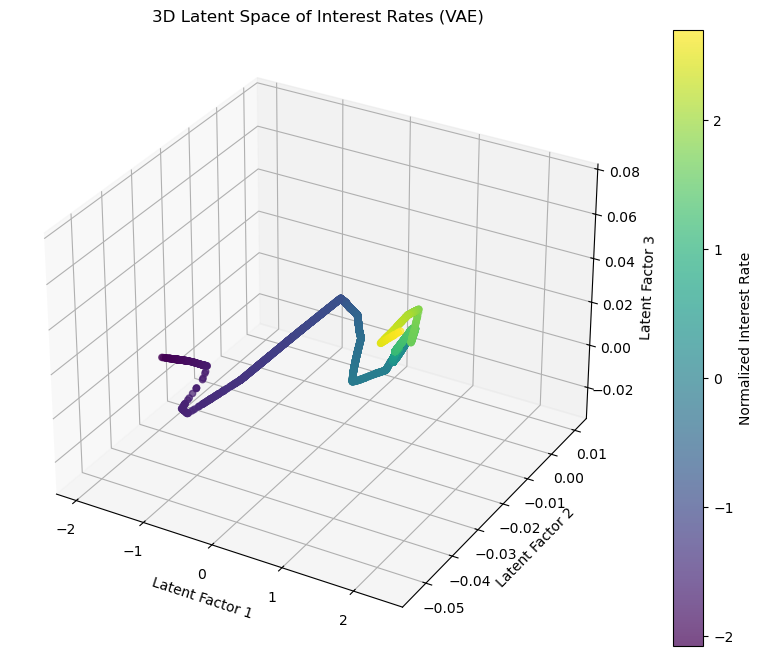

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# Ensure that the latent dimension is 3
latent_dim = 3
z_mean_3d, _, _ = encoder.predict(interest_rates_normalized)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(z_mean_3d[:, 0], z_mean_3d[:, 1], z_mean_3d[:, 2], c=interest_rates_normalized.flatten(), cmap='viridis', alpha=0.7)

# Add color bar using the scatter object
ax.set_title("3D Latent Space of Interest Rates (VAE)")
ax.set_xlabel("Latent Factor 1")
ax.set_ylabel("Latent Factor 2")
ax.set_zlabel("Latent Factor 3")

# Explicitly provide the scatter object to colorbar
fig.colorbar(sc, label="Normalized Interest Rate")
plt.savefig("3D Latent Space of Interest Rates (VAE).png", dpi=300)
plt.show()


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


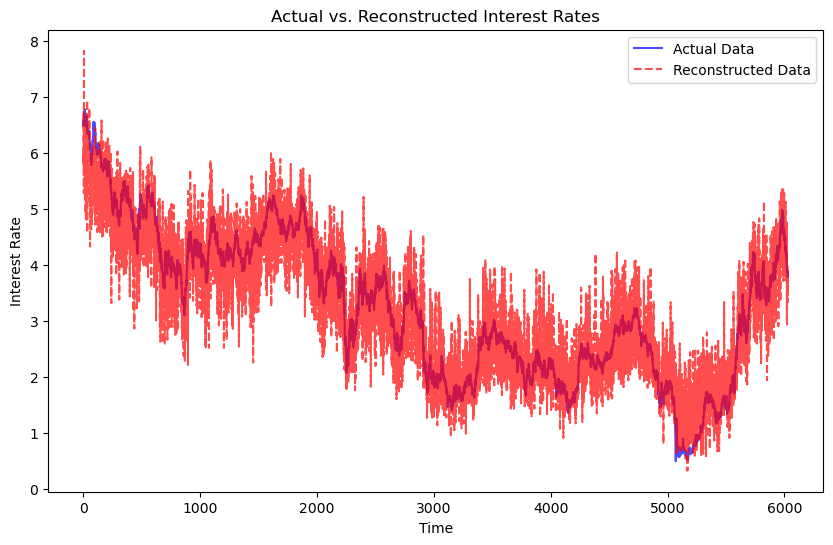

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Reconstruct the data using the decoder
# Assuming 'vae' is your trained VAE model
z_mean, z_log_var, z = encoder.predict(interest_rates_normalized)
reconstructed_normalized = decoder.predict(z)

# Step 2: Inverse transform the data to original scale
interest_rates_original = scaler.inverse_transform(interest_rates_normalized)
reconstructed_original = scaler.inverse_transform(reconstructed_normalized)

# Step 3: Plot actual vs. reconstructed data
plt.figure(figsize=(10, 6))
plt.plot(interest_rates_original, label='Actual Data', color='blue', alpha=0.7)
plt.plot(reconstructed_original, label='Reconstructed Data', color='red', linestyle='--', alpha=0.7)
plt.title('Actual vs. Reconstructed Interest Rates')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.legend()
plt.savefig("Actual vs. Reconstructed Interest Rates(VAE).png", dpi=300)

plt.show()
